# Тестовое задание на вакансию Аналитик в Гиперкуб (стажер) (/intern_an_hypercube)

_Выполнил: Виталий Евтушенко, ВШЭ, ЦМФ МГУ и ВШЭ_

# Task:
**Вам нужно:**
1. скачать Access Log серверов NASA за июль 1995 года отсюда;
2. распарсить файл в Pandas DataFrame;
3. посчитать количество обращений к каждому урлу;
4. найти топ-15 самых посещаемых урлов;
5. посчитать число запросов в секунду;
6. нарисовать график числа запросов в секунду;
7. построить гистограмму распределения размеров запросов.

# Solution:

** Содержание ** <a class="anchor" id="zero-bullet"></a>
* [Cкачать Access Log серверов NASA за июль 1995 года отсюда;](#first-bullet)
* [Распарсить файл в Pandas DataFrame;](#2-bullet)
    * [EDA](#2.1-bullet)
* [Посчитать количество обращений к каждому урлу;](#3-bullet)
* [Найти топ-15 самых посещаемых урлов;](#4-bullet)
* [Посчитать число запросов в секунду;](#5-bullet)
* [Нарисовать график числа запросов в секунду;](#6-bullet)
* [Построить гистограмму распределения размеров запросов.](#7-bullet)

**Используемые библиотеки:**
* **```re```** -- чтобы распарсить сериализованный файл, наиболее простой и принятый из вспомненных методов, ```build-id```;
* **datetime
* **```numpy```** -- чтобы выполнять базовые математические операции, работает с объектами классов из ```pandas``` быстрее, чем встроенный ```math``` (замечание верно для текущих данных), PyData-стэк;
* **```pandas```** -- чтобы привести полученную после парсинга структуру данных к удобному и принятому в анализе данных классу ```pandas.DataFrame```, также позволит использовать встроенный API для работы со строками и временем (```datetime```), PyData-стэк;
* **```matplotlib```** -- базовое построение графиков, желательный бэкэнд для некоторых более комфортных и продвинутых библиотек для построения графиков;
* **```tqdm```** -- для красивого логгирования и оценки времени итеративных операций;

In [1]:
import re
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

In [2]:
%load_ext watermark
%watermark --author "Vitaliy Ye." --date --python -p pandas --machine -g
#%watermark --iversions

Vitaliy Ye. 2018-12-26 

CPython 3.6.2
IPython 6.2.1

pandas 0.23.4

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 8.1
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
Git hash   : HEAD


> > ### Cкачать Access Log серверов NASA за июль 1995 года отсюда; <a class="anchor" id="first-bullet"></a>

### Sourse of a data:
[Link to data](http://ita.ee.lbl.gov/html/contrib/NASA-HTTP.html). Description, Format, Measurement, Privacy, Acknowledgements, etc.

### Format of the every line:

**host** - - [timestamp] **"request"** HTTP reply code **bytes in the reply**. _e.g._:

* cdn.sna.com - - [02/Jul/1995:22:23:53 -0400] "GET /shuttle/missions/sts-71/images/images.html HTTP/1.0" 200 7634
* @.cdn.sna.com - - [05/Jul/1995:22:23:53 -0400] "GET /shuttle/missions/sts-71/images/images.html HTTP/1.0" 404 
* @.88.sna.com - - [28/Jul/1995:10:23:53 -0400] "GET /shuttle/missions/sts-71/images/images.html HTTP/1.0" 304 7634

In [3]:
FILE_PATH = 'access_log_Jul95'

> > ### Распарсить файл в Pandas DataFrame;  <a class="anchor" id="2-bullet"></a>

**Note:** Some usefull introduction to [regexpr](https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html#Parentheses-indicate-groups-to-extract), nice guide to remember basic possibilities.

In [4]:
# pattern = re.compile(r'(.*) - - (\[.*\]) (\".*\") (\d*) (\d*))
pattern = re.compile(\
r'(?P<host>.*) - - \[(?P<timestamp>.*)\] \"(?P<method>\w*) (?P<request>.*)\" (?P<reply_code>\d*) (?P<bytes>\d*)')

**Example line** to training re patter

In [5]:
dict_to_pandas = {'host': [], 'timestamp': [], 'method': [], 'request': [], 'reply_code': [], 'bytes': []}
NUMERIC_COLS = ['reply_code', 'bytes']

In [6]:
%%time 
i = 0
j = 0
# encoding do not selected as ASCII or utf-8 because the decode errors
with open(FILE_PATH, mode='r') as file: # encoding='ASCII'
    for line in tqdm_notebook(file.readlines()):
        try:
            i += 1
            aux_dict = pattern.match(line).groupdict()
            for key in dict_to_pandas.keys():
                if key in NUMERIC_COLS:
                    if aux_dict[key] == '':
                        aux_dict[key] = 0
                    aux_dict[key] = int(aux_dict[key])
                dict_to_pandas[key].append(aux_dict[key])
        except AttributeError:
            j += 1
            print(f'There was an AttributeError at #{i} line')
            print(f'Errored line is {line}')
    print('{} stop read file. {} times with error'.format(i, j))

A Jupyter Widget

There was an AttributeError at #691503 line
Errored line is klothos.crl.research.digital.com - - [10/Jul/1995:16:45:50 -0400] "" 400 -

There was an AttributeError at #1421675 line
Errored line is firewall.dfw.ibm.com - - [20/Jul/1995:07:34:34 -0400] "1/history/apollo/images/" 400 -

There was an AttributeError at #1422424 line
Errored line is firewall.dfw.ibm.com - - [20/Jul/1995:07:53:24 -0400] "1/history/apollo/images/" 400 -

There was an AttributeError at #1454420 line
Errored line is 128.159.122.20 - - [20/Jul/1995:15:28:50 -0400] "kѓыtxѓыtGѓыtНѓы" 400 -

There was an AttributeError at #1649964 line
Errored line is 128.159.122.20 - - [24/Jul/1995:13:52:50 -0400] "kѓыtxѓыtGѓыtНѓы" 400 -

There was an AttributeError at #1891715 line
Errored line is alyssa.p

1891715 stop read file. 6 times with error
Wall time: 13.9 s


Проверим, все ли из встреченных строк были обработаны (в том числе пропущены из-за ошибок)

In [7]:
for key in dict_to_pandas.keys():
    assert len(dict_to_pandas[key]) + j == i

Теперь получим объект класса ```pandas.DataFrame``` из нашего словаря, приведем типы (например,```HTTP reply code``` не может быть отрицательным или более $600$ -- используем тип ```np.uint16```, а максимальное количество возвращаемых байтов в данных не велико и не отрицательно -- используем тип ```np.uint32```).

In [8]:
%%time
df = pd.DataFrame(dict_to_pandas)
df.reply_code = df.reply_code.astype(np.uint16)
df.bytes = df.bytes.astype(np.uint32)

Wall time: 1.57 s


Получим общее представление о данных -- колонки, их типы и размер данных в памяти машины.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891709 entries, 0 to 1891708
Data columns (total 6 columns):
host          object
timestamp     object
method        object
request       object
reply_code    uint16
bytes         uint32
dtypes: object(4), uint16(1), uint32(1)
memory usage: 68.6+ MB


Теперь получим менее общее и более наглядное представление о данных (preliminary, naive but EDA)

In [10]:
%%time
pandas_profiling.ProfileReport(df)

Wall time: 25.1 s


Number of variables,6
Number of observations,1891709
Total Missing (%),0.0%
Total size in memory,68.6 MiB
Average record size in memory,38.0 B
Numeric,2
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


**Status:** done. [К содержанию](#zero-bullet)

> > ### Посчитать количество обращений к каждому урлу; <a class="anchor" id="3-bullet"></a>

Найдём абсолютное значение встречаемости "урлов"

In [11]:
%%time
# df['host'].value_counts().sort_values(ascending=False).head(16)
df_request_count = df['request'].value_counts().sort_values(ascending=False)
display(df_request_count.head(3))

/images/NASA-logosmall.gif HTTP/1.0      111085
/images/KSC-logosmall.gif HTTP/1.0        89528
/images/MOSAIC-logosmall.gif HTTP/1.0     60298
Name: request, dtype: int64

Wall time: 418 ms


**Answer:** было посчитано количество обращений к каждому из выделенных в процессе парсинга "урлов"

**Status:** done. [К содержанию](#zero-bullet)

> > ### Найти топ-15 самых посещаемых урлов; <a class="anchor" id="4-bullet"></a>

Найдём 15 самых посещаемых "урлов", а также посчитаем их относительный вес от всех посещений.

In [12]:
%%time
# df.groupby('host')['host'].count().sort_values(ascending=False).head(15)
df_request_count.head(15)

Wall time: 0 ns


/images/NASA-logosmall.gif HTTP/1.0                 111085
/images/KSC-logosmall.gif HTTP/1.0                   89528
/images/MOSAIC-logosmall.gif HTTP/1.0                60298
/images/USA-logosmall.gif HTTP/1.0                   59843
/images/WORLD-logosmall.gif HTTP/1.0                 59323
/images/ksclogo-medium.gif HTTP/1.0                  58614
/images/launch-logo.gif HTTP/1.0                     40841
/shuttle/countdown/ HTTP/1.0                         40238
/ksc.html HTTP/1.0                                   40040
/images/ksclogosmall.gif HTTP/1.0                    33555
/ HTTP/1.0                                           32646
/history/apollo/images/apollo-logo1.gif HTTP/1.0     31052
/shuttle/missions/missions.html HTTP/1.0             24826
/htbin/cdt_main.pl HTTP/1.0                          22599
/shuttle/countdown/count.gif HTTP/1.0                22189
Name: request, dtype: int64

In [13]:
print('{} % составляют обращения к топ-15 урлов от обращений ко всем "урлам"'.format(round(\
    df_request_count.head(15).sum() / df_request_count.sum(), 2)))

0.38 % составляют обращения к топ-15 урлов от обращений ко всем "урлам"


Построим диаграмму абсолютных значений встречаемости топ-15 "урлов"

Wall time: 80.1 ms


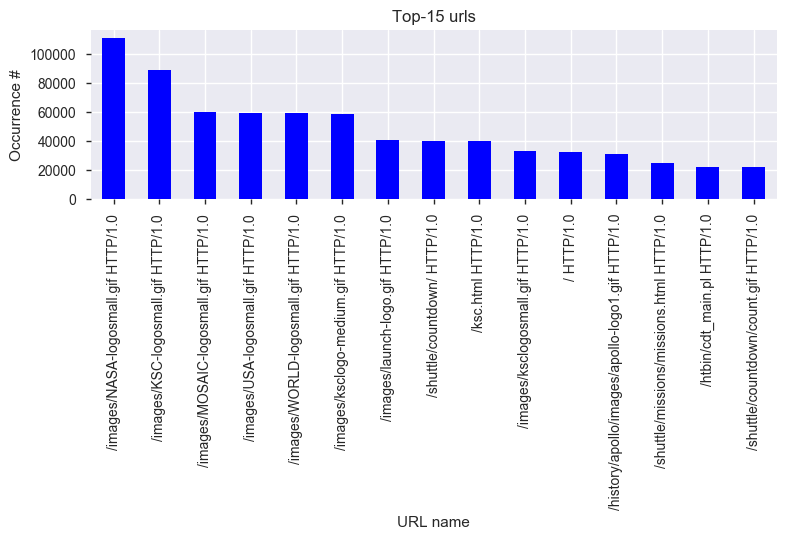

In [14]:
%%time
fig, axes = plt.subplots(nrows=1, ncols=1)
df_request_count.head(15).plot('bar', axes, title='df', color='blue', grid=True)
plt.title('Top-15 urls')
plt.ylabel('Occurrence #')
plt.xlabel('URL name')
plt.tight_layout()

**Answer:** из данных по количеству обращений к выделенных при парсинге "урлам" были выявлено пятнадцать наиболее посещаемых (_представлены на диаграмме выше_). В основном пользователи искали:
* маленькие картинки с логотипами североамериканского космического агенства и космического центра им. Кеннеди; 
* другие картинки с логотипами или космический снимок "мозайку"; 
* картинки или анимации обратного отсчёта;
* историю программ "Аполлон" и "Спейс шаттл".

Подозрение вызывает запрос на адрес ```/```. Вероятно, это обращение к корневому сайту NASA.

**Status:** done. [К содержанию](#zero-bullet)

**Note:** Также можно представить на облаке слов, получить которое можно с помощью библиотеки ```wordcloud```. Однако, формальная интерпретация такого графика не высока (нет явных цифр). Но выглядит эффектно.

<a href="http://www.freeimagehosting.net/commercial-photography/"><img src="https://i.imgur.com/3vSgBaQ.png" alt="Commercial Photography (required by hosting)"></a>

> > ### Посчитать число запросов в секунду; <a class="anchor" id="5-bullet"></a>

Можно распарсить признак ```timestamp``` кодом ниже, но пока что в этом нет необходимости.

Чтобы посчитать число запросов в секунду достаточно число запросов разделить на число прошедших к моменту последнего запроса секунд.

$$
\begin{aligned}
\text{number of requests per second} = \dfrac{number_{request}}{(time_{end} - time_{0})}
\end{aligned}
$$

In [15]:
df.tail()

,host,timestamp,method,request,reply_code,bytes
1891704,163.205.53.14,28/Jul/1995:13:32:22 -0400,GET,/shuttle/technology/images/srb_mod_compare_6-s...,200,28219
1891705,163.205.53.14,28/Jul/1995:13:32:23 -0400,GET,/images/KSC-logosmall.gif HTTP/1.0,200,1204
1891706,tiger2.ocs.lsu.edu,28/Jul/1995:13:32:23 -0400,GET,/shuttle/missions/missions.html HTTP/1.0,200,8677
1891707,199.0.2.27,28/Jul/1995:13:32:23 -0400,GET,/images/ksclogo-medium.gif HTTP/1.0,200,5866
1891708,tornado.umd.edu,28/Jul/1995:13:32:25 -0400,GET,/shuttle/missions/sts-74/sts-74-patch-small.gi...,200,5494


Число запросов равно числу данных в исходном наборе данных, а число пройденных секунд равняется числу секунд в дате последнего отчёта, так как время первого сделанного запроса принимается за точку отчета.

In [ ]:
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

# create coloring from image
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


In [16]:
round(df.shape[0] / (27 * 24 * 3600 + 13 * 3600 + 32 * 60 +25), 3)

0.794

**Answer:** Видно, что в среднем в секунду делается $0.794$ запроса (с точностью до $3$ значащих цифр после запятой).

**Status:** done. [К содержанию](#zero-bullet)

> > ### Нарисовать график числа запросов в секунду; <a class="anchor" id="6-bullet"></a>

Построим график данных имеющих временную структуру. Для этого преобразуем все даты к типу ```datetime64[ns]``` (увеличит количество настроек, принимающих значение по умолчанию при построении графика) и создадим вспомогательный набор данных с каждой секундой в анализируемый период (чтобы иметь возможность отобразить то время секундной частоты, когда запросов сделано и зафиксировано не было).

In [17]:
%%time
df['timestamp'] = df['timestamp'].str.replace('Jul', '07')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y:%H:%M:%S -0400', infer_datetime_format=True)

Wall time: 8.2 s


In [18]:
%%time
ts = pd.Series(0, index=pd.date_range('1995-07-01', '1995-07-30', freq='S'), 
               name='request')
ts = ts + df.groupby(['timestamp'])['request'].size()

Wall time: 617 ms


**Note**: базовые советы и примеры визуализации данных с временной структурой можно найти, например, [здесь](https://machinelearningmastery.com/time-series-data-visualization-with-python/) или [здесь](https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html) (лучше)

Также, изменим стиль со стандартного line graph на точечный стиль (без соединений), так как на данных $28$ дней и $13.5$ часов не очень удобно визуализировать все данные. 

Wall time: 12.6 s


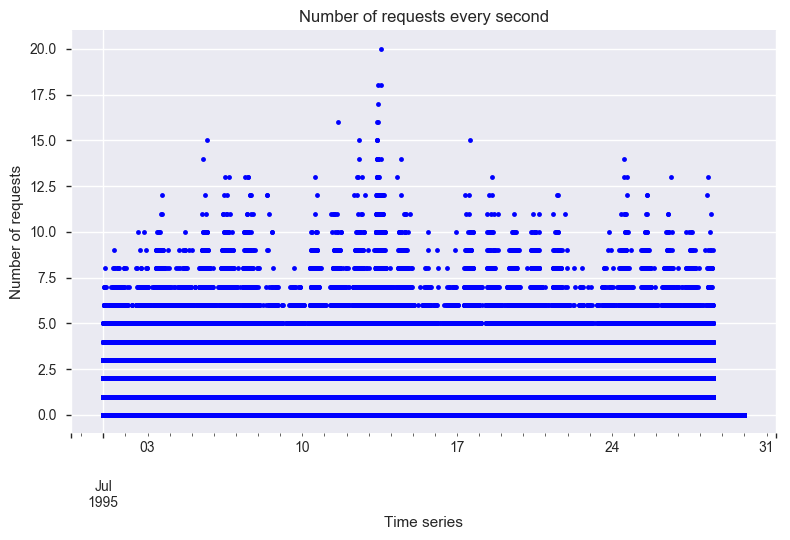

In [19]:
%%time
ts.fillna(0).plot(style='.b')
plt.title('Number of requests every second')
plt.ylabel('Number of requests')
plt.xlabel('Time series')
plt.tight_layout()

Также, можно "поиграть" с разными периодами. Давайте проведем эксперимент с данным взятыми по $30$ секунд, $5$ минут, $30$ минут, $1$ час и $3$ часа. 

Wall time: 4.21 s


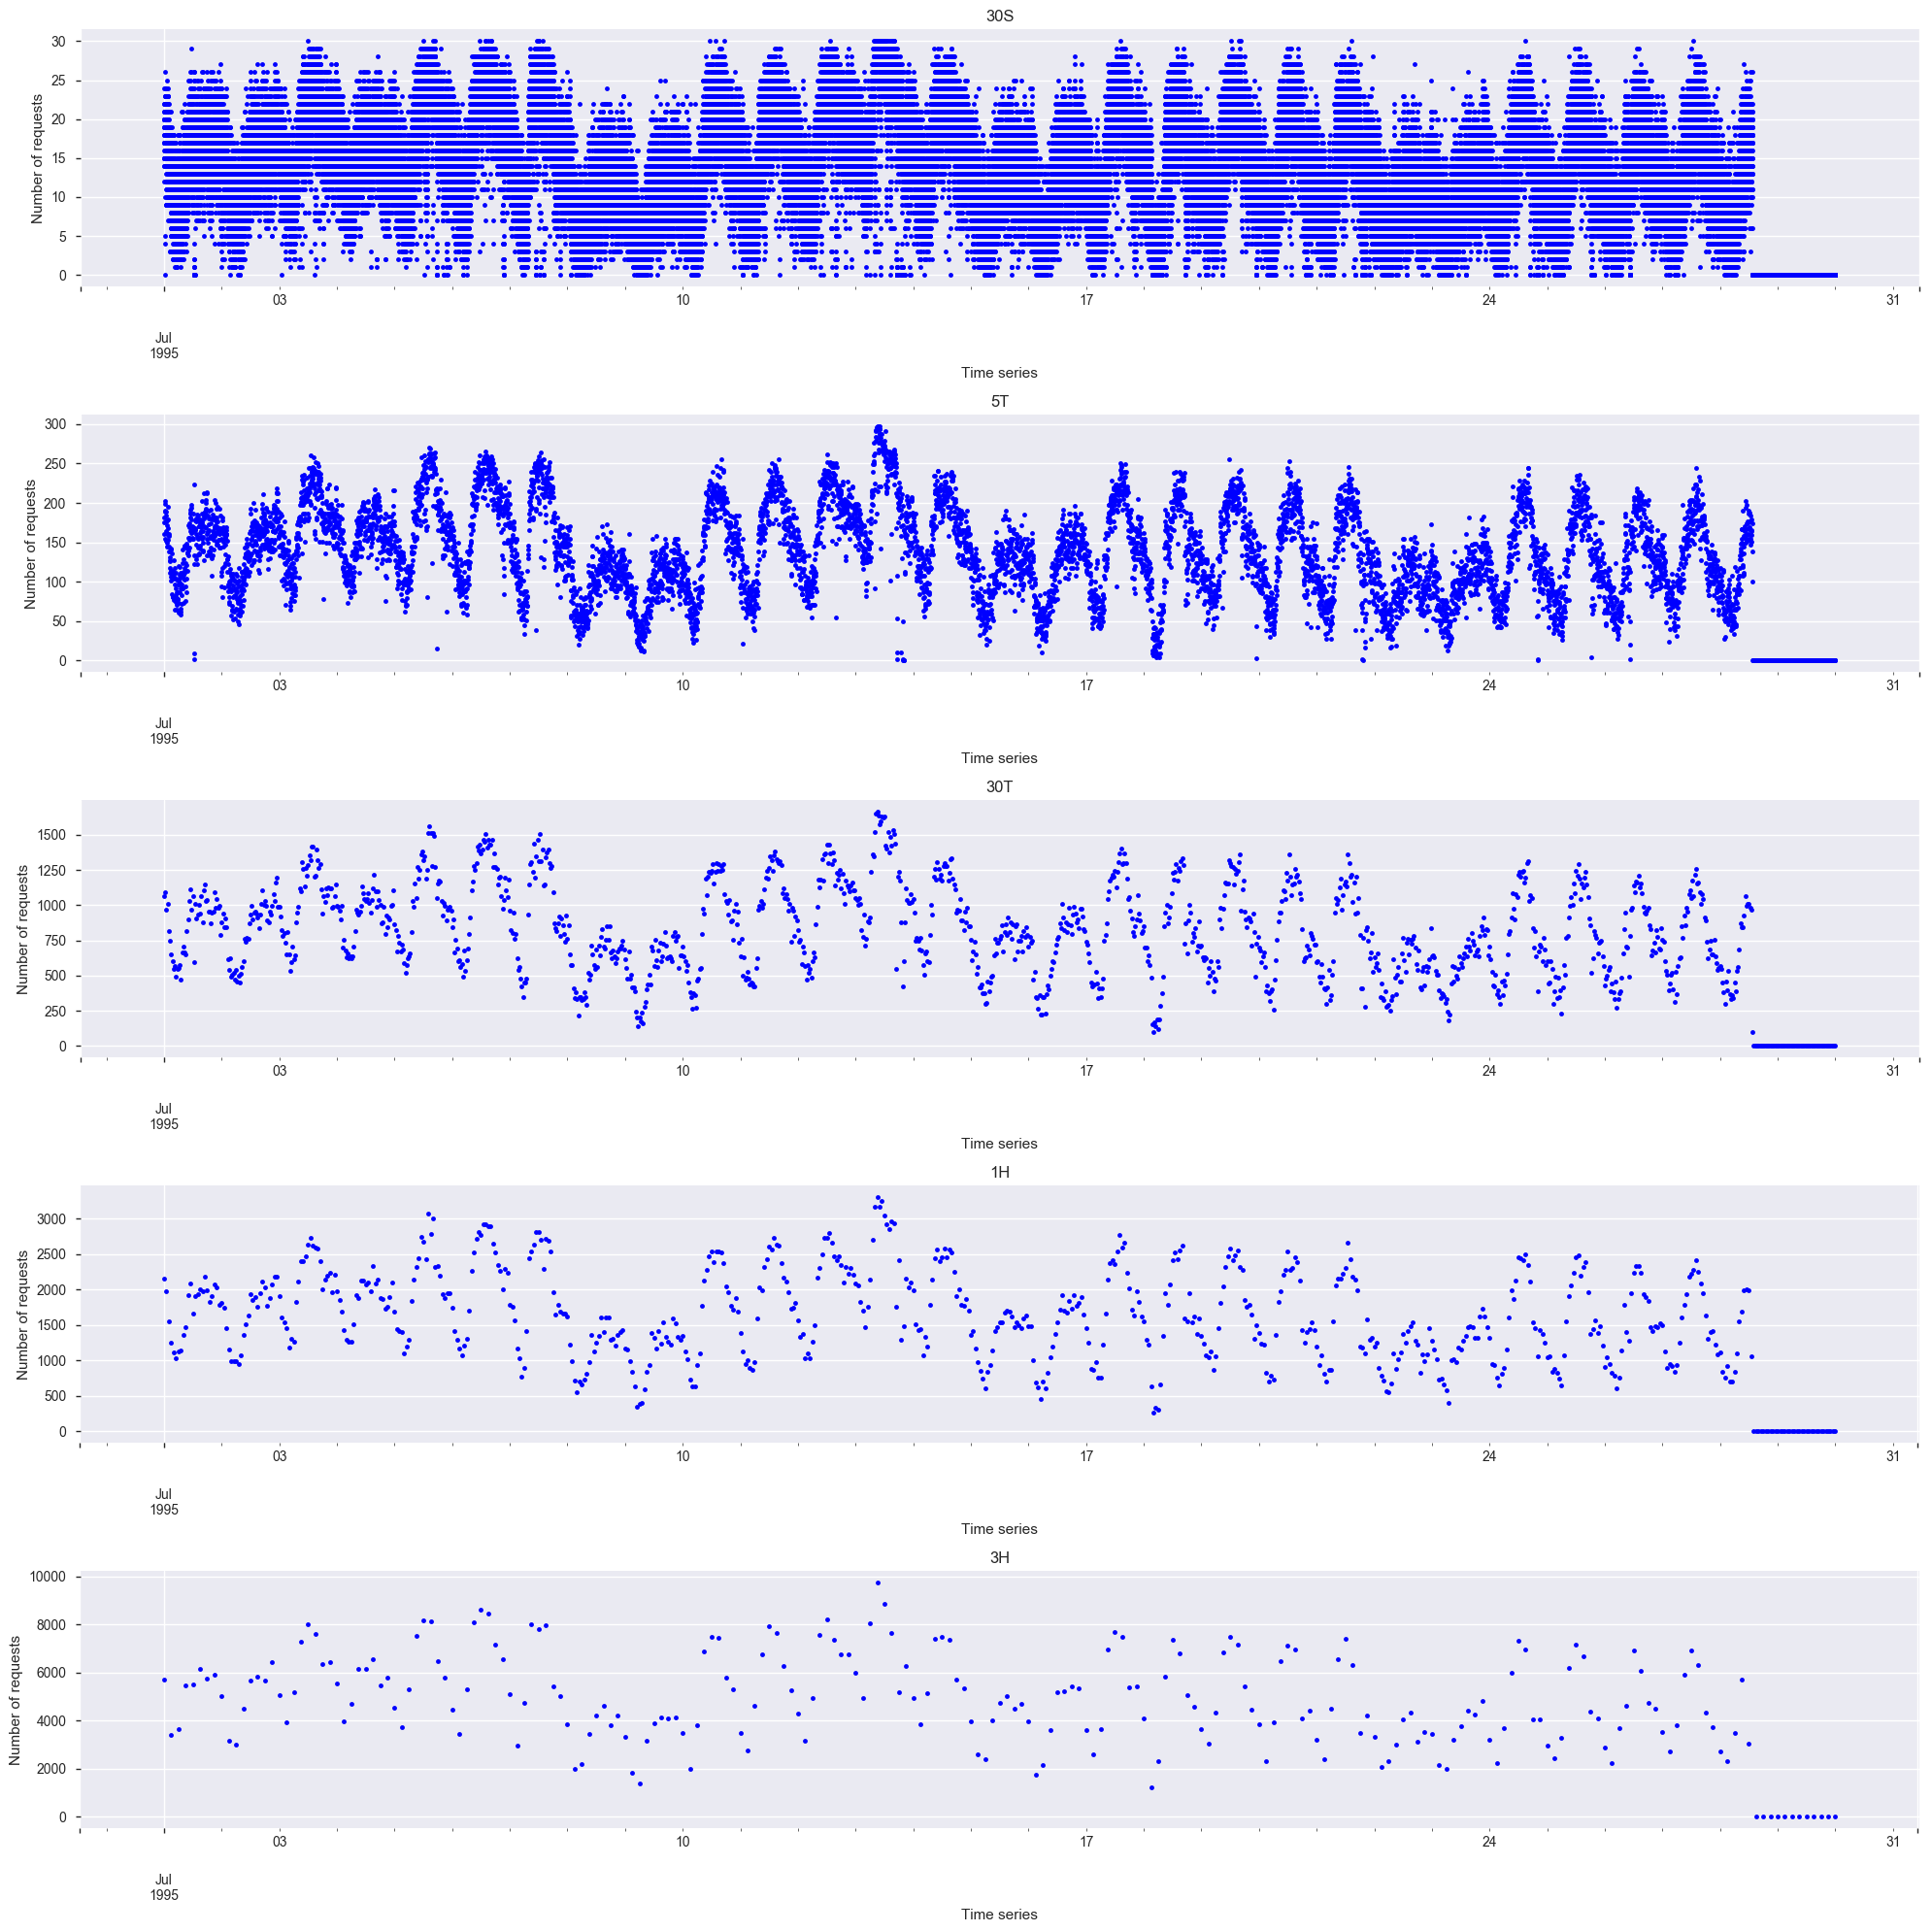

In [20]:
%%time
trials = ['30S', '5T', '30T', '1H', '3H']
fig, axes = plt.subplots(nrows=len(trials), ncols=1, figsize=(20, 20))
for freq in enumerate(trials):
    ts.resample(rule=freq[1]).count().plot('line',  
                                        style='.b',
                                        ax=axes[freq[0]],
                                       )
    axes[freq[0]].set_title(freq[1]); 
    axes[freq[0]].set_xlabel('Time series')
    axes[freq[0]].set_ylabel('Number of requests')
plt.tight_layout()

**Answer:** Был построен график временного ряда с большим количеством пропусков отклика. Для улучшения восприятия визуализации можно разбить анализируемый период на отрезки (например, недели, тем самым изменяя масштаб) или изменяя частоты события (группируя по минутам и отличным от одной секунды долям минут, часам, дня, или иными способами; например, функцией ```pd.DataFrame.resample```). Хорошо визуализирует частота в $5$ минут. Также, при дальнейшем анализе, например, прогноза количества запросов можно использовать методы feature generation для данных имеющих временной тренд.

**Status**: done. [К содержанию](#zero-bullet)

> > ### Построить гистограмму распределения размеров запросов. <a class="anchor" id="7-bullet"></a>

Построим гистограмму распределения размеров запросов. Для этого, сначала изучим, какие значения принимают размеры запросов.

In [21]:
df.bytes.describe()

count    1.891709e+06
mean     2.045556e+04
std      7.695751e+04
min      0.000000e+00
25%      7.860000e+02
50%      3.635000e+03
75%      1.185300e+04
max      6.823936e+06
Name: bytes, dtype: float64

Как видим, у данных очень высокий разброс (различаются порядки)

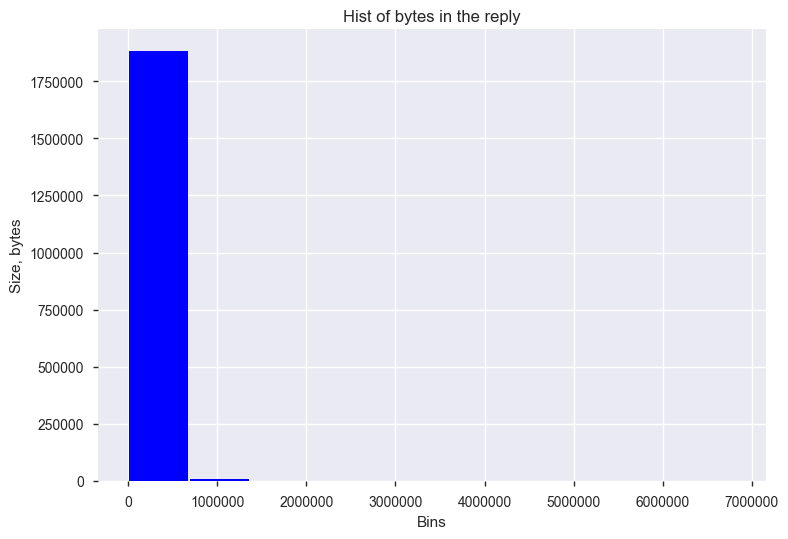

In [22]:
df.bytes.hist(color='b', rwidth=0.98)
plt.title('Hist of bytes in the reply')
plt.ylabel('Size, bytes')
plt.xlabel('Bins')
plt.tight_layout()

Такая гистаграмма не даст ничего, по этой причине применим логарифмирование для хорошей обработки разных порядков в данных.

In [23]:
%%time
df.bytes.apply(np.log1p).describe()

Wall time: 157 ms


count    1.891709e+06
mean     7.623888e+00
std      2.876209e+00
min      0.000000e+00
25%      6.668228e+00
50%      8.198639e+00
75%      9.380421e+00
max      1.573595e+01
Name: bytes, dtype: float64

Теперь проблема порядков видна намного менее. Построим новую диаграмму.

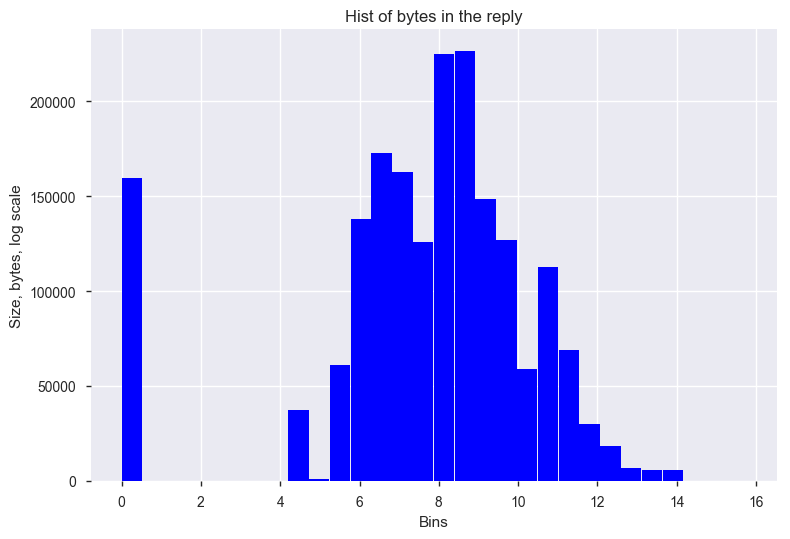

In [24]:
df.bytes.apply(np.log1p).hist(bins=30, color='b', rwidth=0.98)
plt.title('Hist of bytes in the reply')
plt.ylabel('Size, bytes, log scale')
plt.xlabel('Bins')
plt.tight_layout()

**Answer:** Была построена диаграмма логорифмированного значения размера возвращаемого на запрос ответа. Большая часть наблюдений имеет нулевое значение размера возвращаемого на запрос ответа.

**Status:** done.

___

* Если Вам понравилось мое решение это тестового задания, связаться со мной можно [так](mailto:yevtushenko.vit@gmail.com) (e-mail). 

* А посмотреть резюме [здесь, Firebase Dynamic Link](https://cvvitaliy.page.link/my_cv) или [здесь, Google Drive](https://drive.google.com/file/d/1HJ4bI24iZigElZcQitHb4f0RQirVWiN1/view?usp=sharing).

[К содержанию](#zero-bullet)